<a href="https://colab.research.google.com/github/xxpaulo-victorxx/Pizza-Sales/blob/main/Pizza_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução

---



Este conjunto de dados contém informações detalhadas sobre pedidos de pizza de um restaurante ou fornecedor específico. Ele captura vários aspectos de cada pedido de pizza, incluindo detalhes sobre as pizzas, quantidades, preços, datas do pedido e detalhes de categorização.

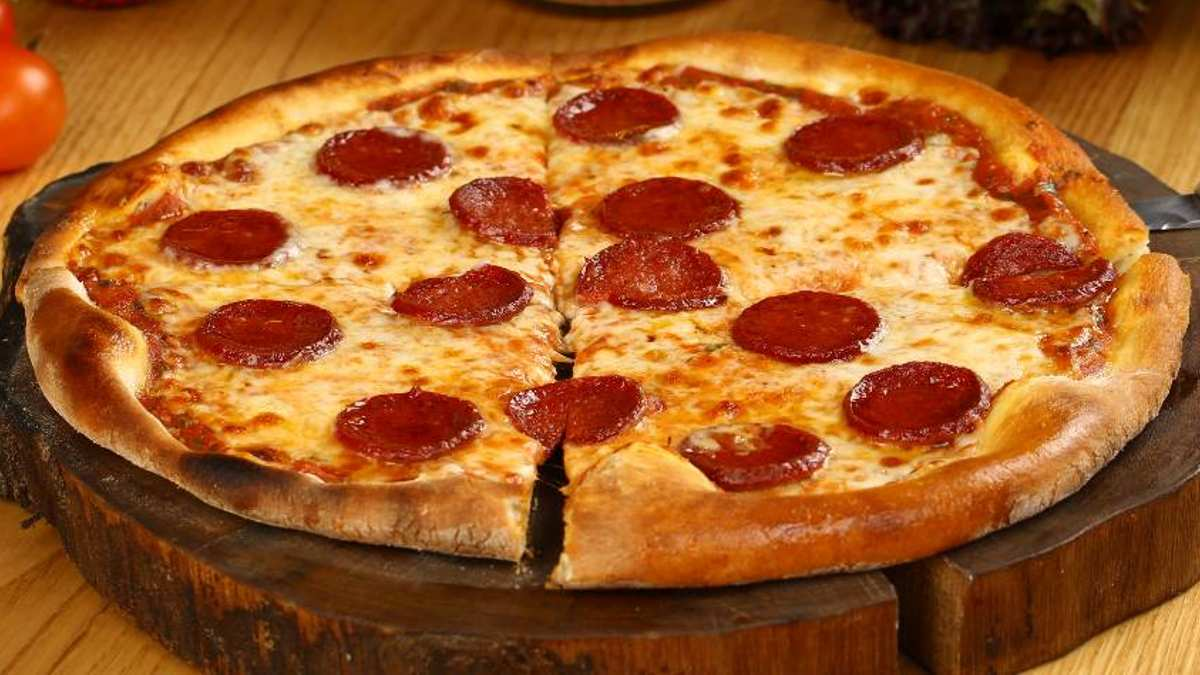

## Bibliotecas Utilizadas

---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 500)

colors_dict = {
    "Red": "#8c0404",
    "Pink": "#f25ed0",
    "Black": "#000000",
    "Green": "#16A085",
    "Dark Blue": "#34495E",
    "Navy Blue": "#21618C",
    "Purple": "#512E5F",
    "Turquoise": "#45B39D",
    "Gray": "#AAB7B8",
    "Light Blue": "#20B2AA",
    "Hot Pink": "#FF69B4",
    "Dark Turquoise": "#00CED1",
    "Coral": "#FF7F50",
    "Lime": "#7FFF00",
    "Orchid": "#DA70D6"
}

## Importando e Filtrando Dados

---

In [ ]:
df = pd.read_csv("/content/sample_data/pizza_sales.csv")

df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [ ]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [ ]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
# replace the abbreciations
df['pizza_size'] = df['pizza_size'].replace({'S': 'Small', 'M': 'Medium', 'L': 'Large', 'XL' : 'X-Large' , 'XXL' : 'XX-Large'}, inplace=False)

df.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,Medium,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,Medium,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,Large,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,Large,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,Medium,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6.0,2.0,thai_ckn_l,1.0,1/1/2015,11:57:40,20.75,20.75,Large,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7.0,3.0,ital_supr_m,1.0,1/1/2015,12:12:28,16.50,16.50,Medium,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8.0,3.0,prsc_argla_l,1.0,1/1/2015,12:12:28,20.75,20.75,Large,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9.0,4.0,ital_supr_m,1.0,1/1/2015,12:16:31,16.50,16.50,Medium,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10.0,5.0,ital_supr_m,1.0,1/1/2015,12:21:30,16.50,16.50,Medium,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


## Gráficos e Análises

---

<ipython-input-7-ec7f9060c566>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pizza_category', palette='YlGnBu')


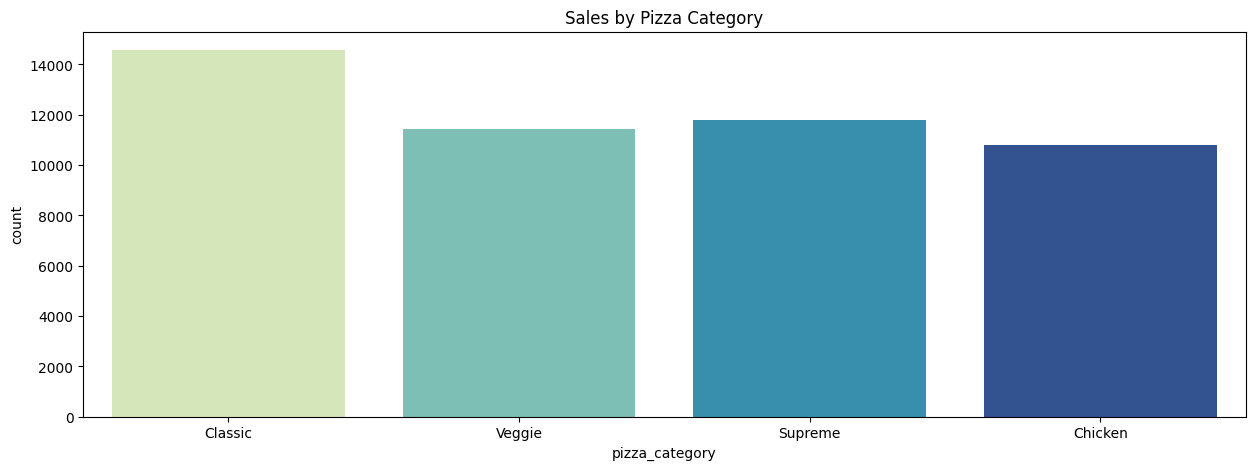

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data=df, x='pizza_category', palette='YlGnBu')
plt.title('Sales by Pizza Category')

plt.show()

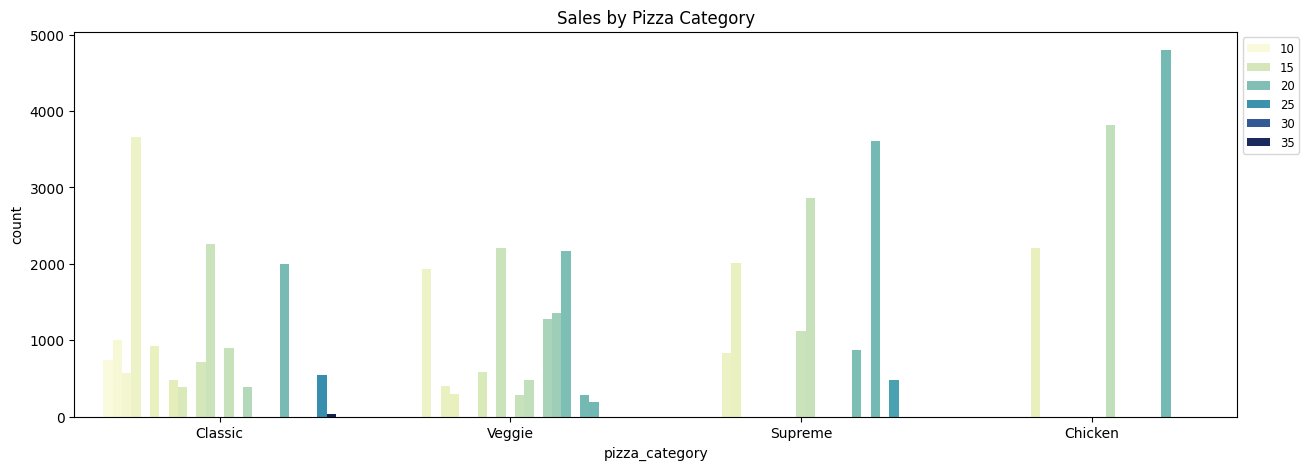

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data=df, x="pizza_category", palette="YlGnBu", hue="unit_price")
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize='small')
plt.title('Sales by Pizza Category')

plt.show()

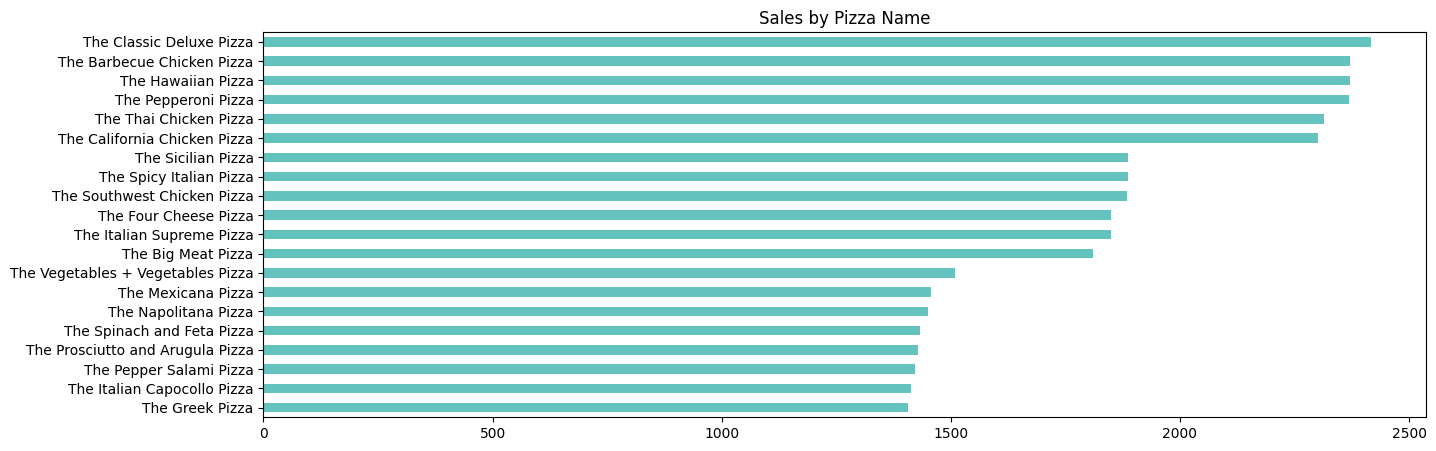

In [ ]:
plt.figure(figsize=(15,5))

df["pizza_name"].value_counts().head(20).sort_values(ascending=True)\
.plot(kind="barh", color=sns.color_palette("YlGnBu")[2])
plt.title("Sales by Pizza Name")

plt.show()

In [ ]:
frequency = {}
for row in df["pizza_ingredients"].str.split(","):
    for word in row:
        word = word.strip()
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
frequency_df = pd.DataFrame.from_dict([frequency]).T.sort_values(by=0, ascending=False).head(10)

<ipython-input-15-e93ea8092860>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = frequency_df, x=0, y=frequency_df.index, palette=sns.color_palette("YlGnBu_r"))
<ipython-input-15-e93ea8092860>:3: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = frequency_df, x=0, y=frequency_df.index, palette=sns.color_palette("YlGnBu_r"))


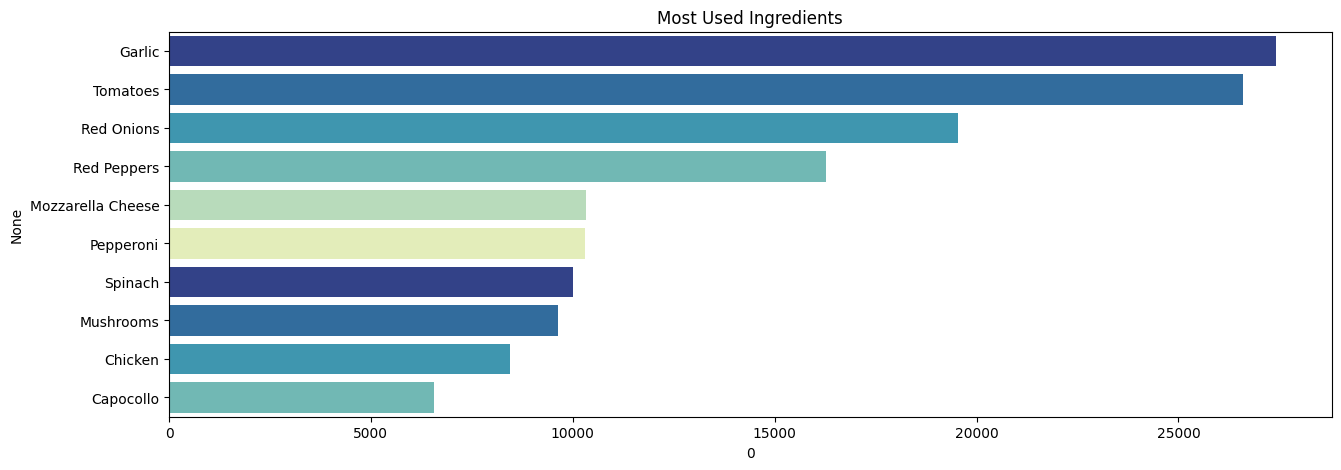

In [ ]:
plt.figure(figsize=(15,5))

sns.barplot(data = frequency_df, x=0, y=frequency_df.index, palette=sns.color_palette("YlGnBu_r"))
plt.title("Most Used Ingredients")

plt.show()

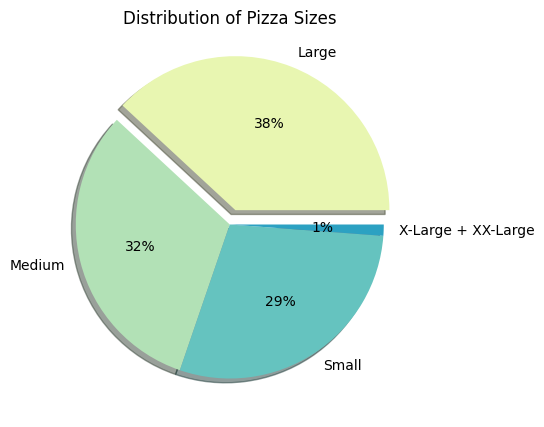

In [ ]:
plt.figure(figsize=(10,5))
color_palette = sns.color_palette("YlGnBu")
size = df["pizza_size"].value_counts()
size["X-Large + XX-Large"] = size["X-Large"] + size["XX-Large"]
size = size.drop(["X-Large", "XX-Large"])


plt.pie(data = size,\
        x=size.values, labels = size.index, \
        explode=(0.1,0,0,0), autopct='%1.0f%%', \
        shadow=True, colors=color_palette)
plt.title("Distribution of Pizza Sizes")
plt.show()